# Imports

In [2]:
import pandas as pd
import dill
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt
import torch
import numpy as np
import os

# Helper

In [3]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages

# EDIT HERE
-  Look at the output below and copy your exact reward_list file name and paste in the next cell where asked along with model name

In [4]:
os.listdir('./results/')

['model_PPO_EXPT_Wizard_Vs_Manticore_STARTED_2022-11-06T19-27-07_ITERS_10.pickle',
 'model_PPO_EXPT_Wizard_Vs_Manticore_STARTED_2022-11-06T19-27-07_ITERS_20.pickle',
 'model_PPO_EXPT_Wizard_Vs_Manticore_STARTED_2022-11-06T19-27-07_ITERS_30.pickle',
 'model_PPO_EXPT_Wizard_Vs_Manticore_STARTED_2022-11-06T19-27-07_ITERS_40.pickle',
 'model_PPO_EXPT_Wizard_Vs_Manticore_STARTED_2022-11-06T19-27-07_ITERS_50.pickle',
 'PPO.png',
 'reward_list_PPO_EXPT_Wizard_Vs_Manticore_STARTED_2022-11-06T19-27-07_NITERS50.pickle',
 'winner_list_PPO_EXPT_Wizard_Vs_Manticore_STARTED_2022-11-06T19-27-07_NITERS50.pickle']

In [5]:
model_name = "PPO"
winner_list_file_name = 'winner_list_PPO_EXPT_Wizard_Vs_Manticore_STARTED_2022-11-06T19-27-07_NITERS50.pickle'

Number of games played: 50
0
creature plot


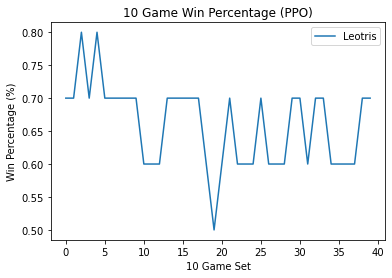

In [6]:
winner_list = dill.load(open("results/"+winner_list_file_name, "rb"))

batch_size = 10
win_pcts = defaultdict(list)
avg_rewards = list()

creatures = ["Leotris"]  #, "Strahd", "Timeout"]

print("Number of games played: {}".format(len(winner_list)))

# Graph win percentage:
for i in range(0, len(winner_list) - batch_size):
    if i%50000==0:print(i)
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=creatures)
    for creature, batch_win_pct in win_pct.items():
        win_pcts[creature].append(batch_win_pct)
print('creature plot')
for creature in creatures:
    plt.plot(range(len(win_pcts[creature])), win_pcts[creature], label=creature)
plt.title("{} Game Win Percentage ({})".format(batch_size, model_name))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.legend()
plt.savefig('results/{}_{}.png'.format(model_name,winner_list_file_name[:-4]))
plt.show()